In [5]:
from Helpers import test_operations
from B_plus_tree_refactored import BPlusTree
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Insertion and deletion of some prime numbers

After inserting 29:


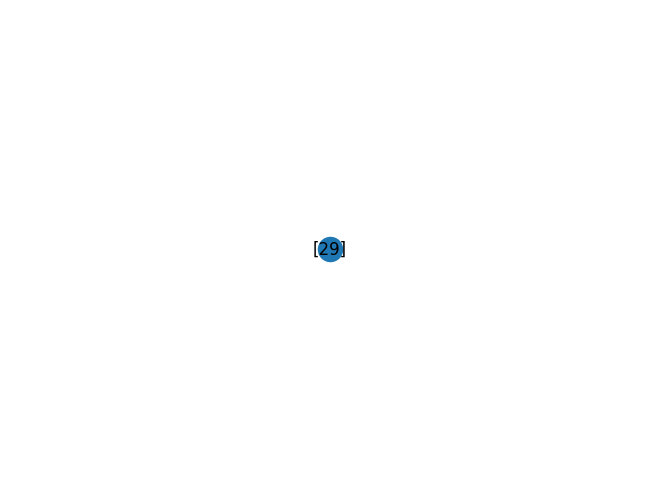

After inserting 5:


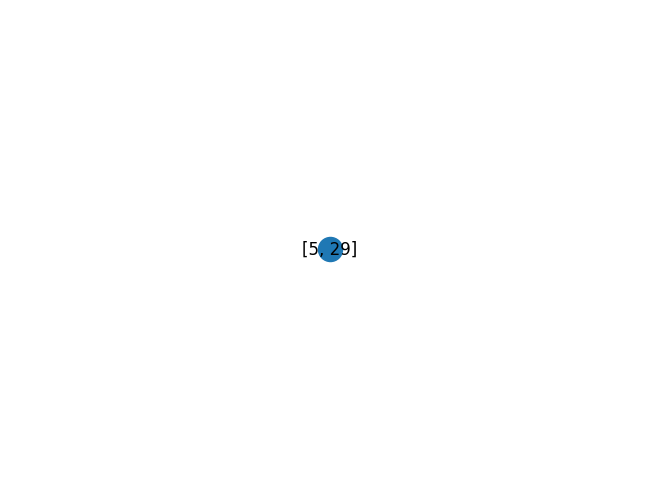

After inserting 7:


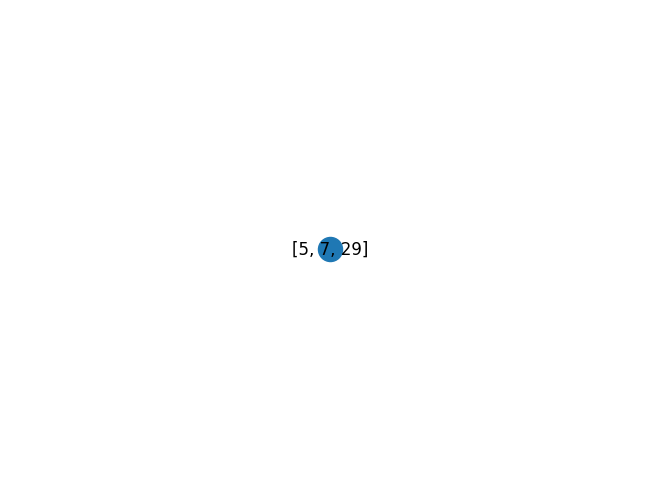

After inserting 17:


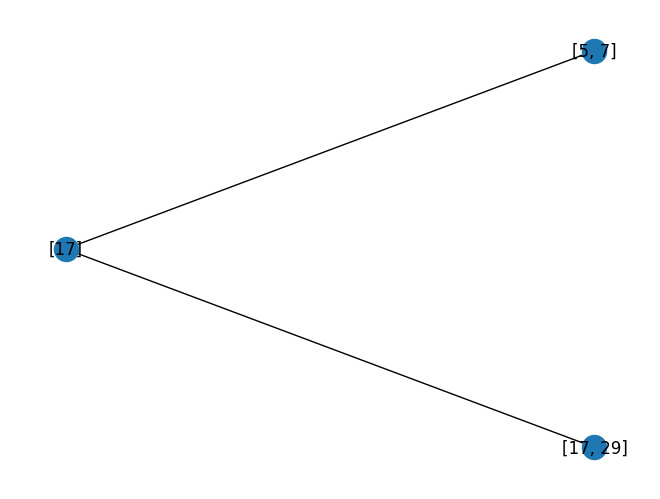

After inserting 19:


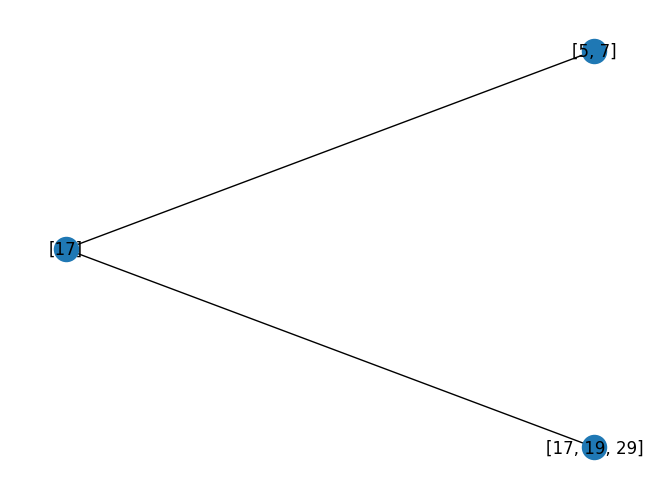

After inserting 31:


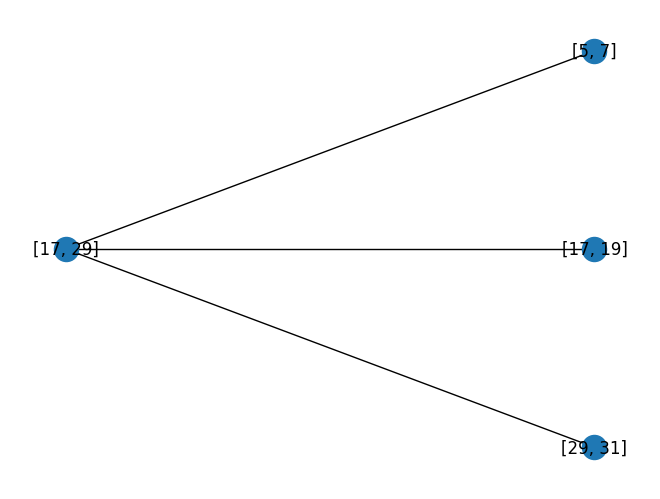

After inserting 2:


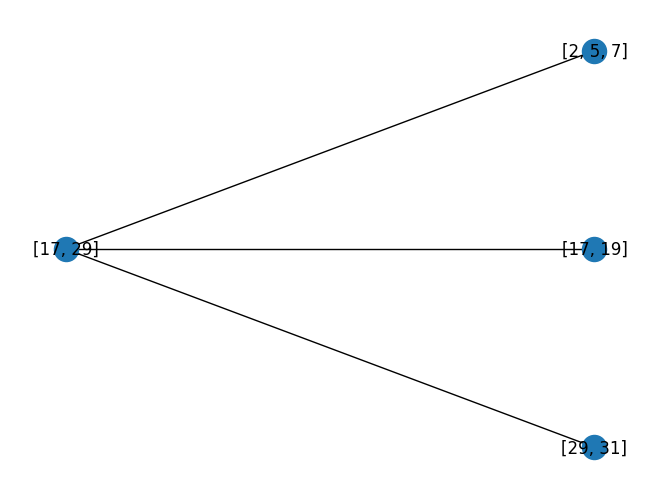

After inserting 23:


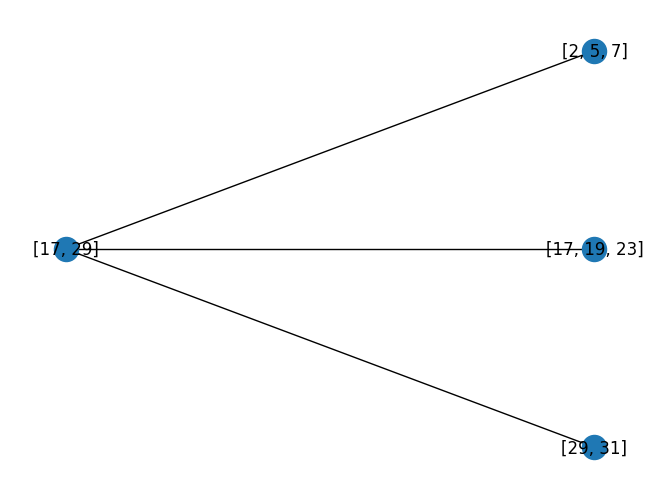

After inserting 11:


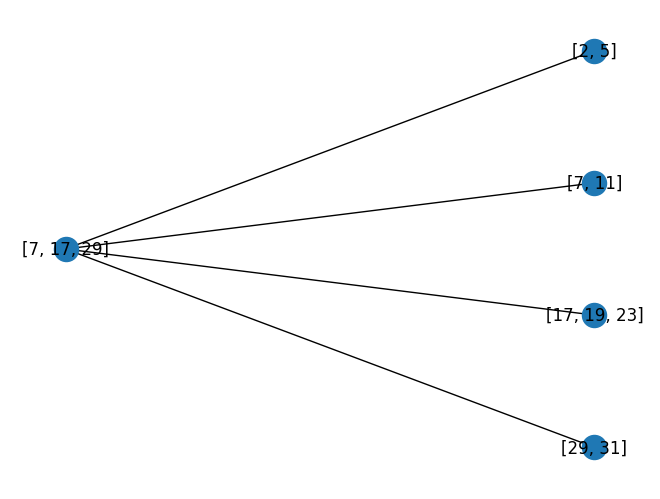

After inserting 3:


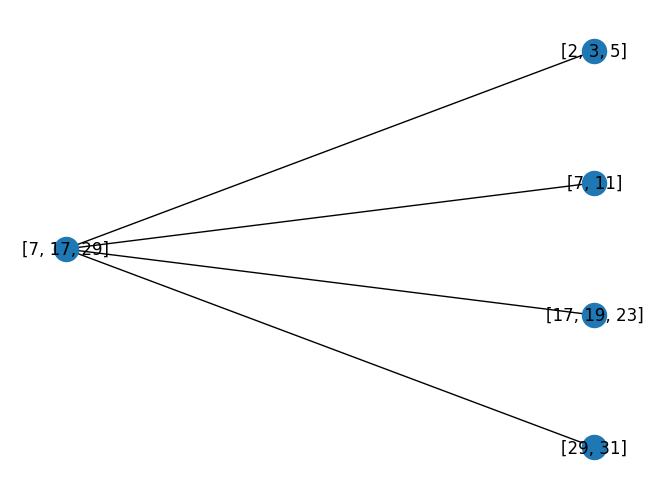

After deleting 3:


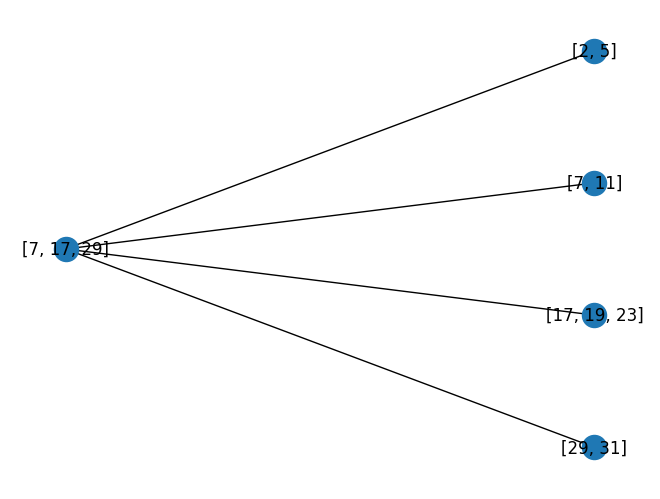

After deleting 11:


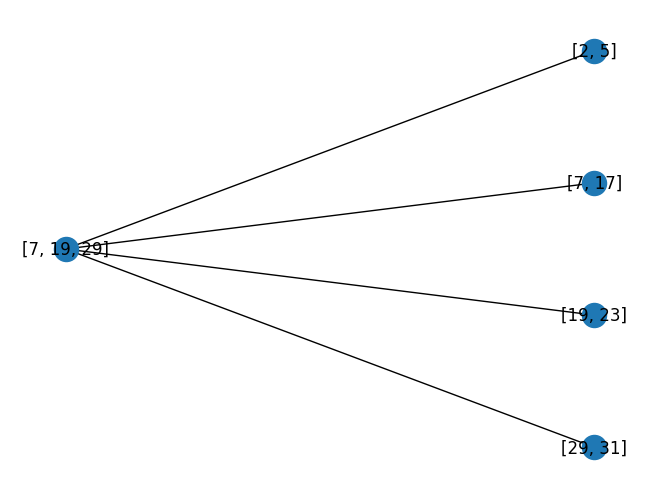

After deleting 23:


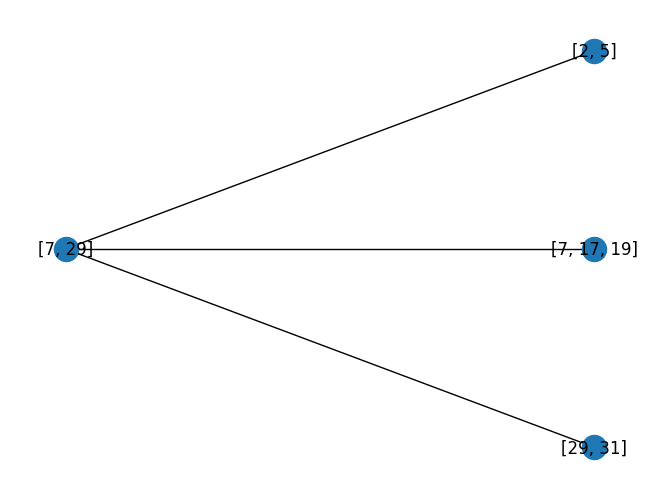

After deleting 2:


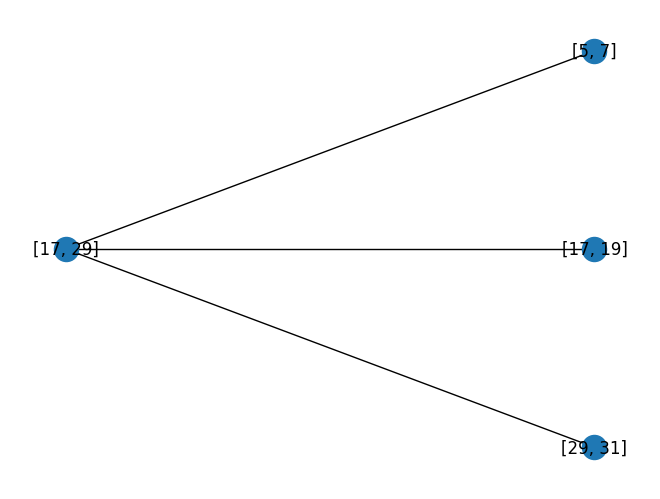

After deleting 31:


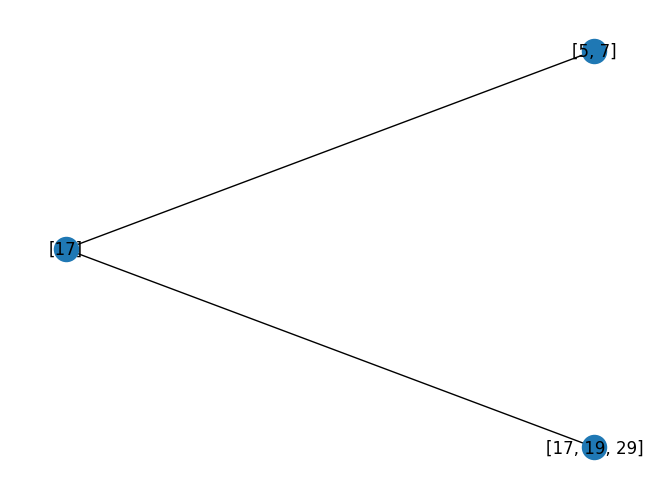

After deleting 19:


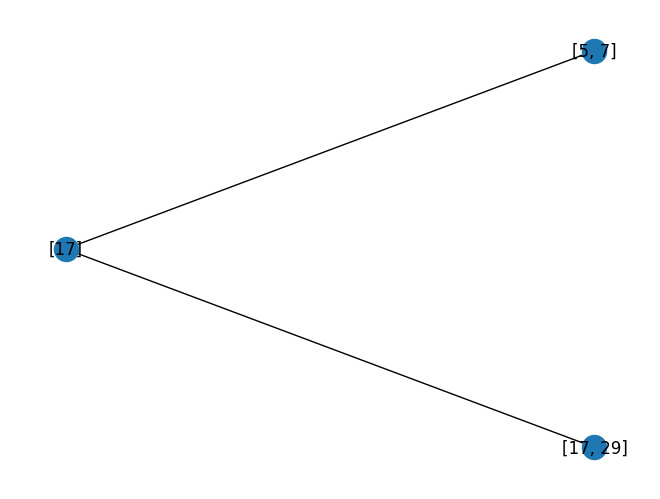

After deleting 17:


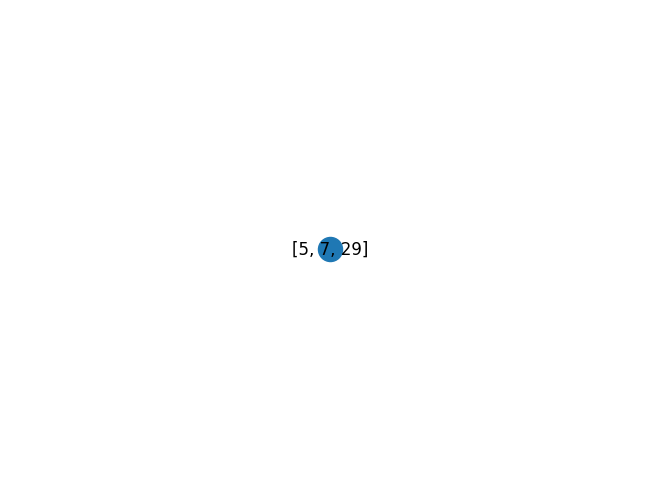

After deleting 7:


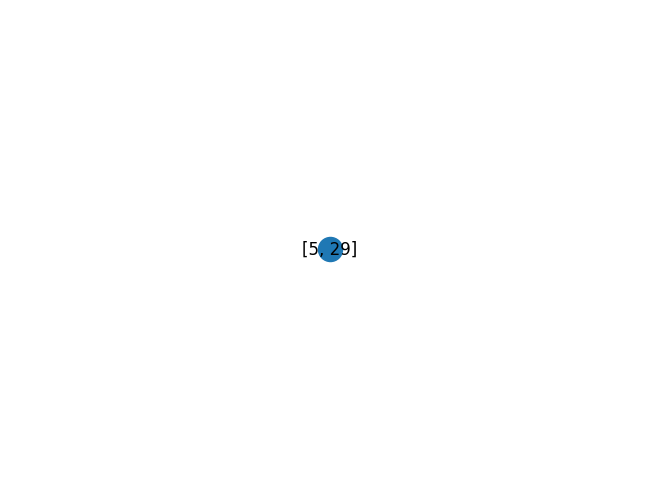

After deleting 5:


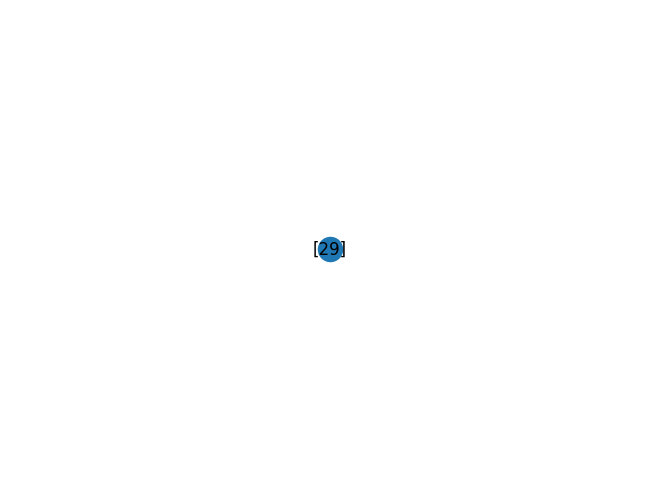

After deleting 29:


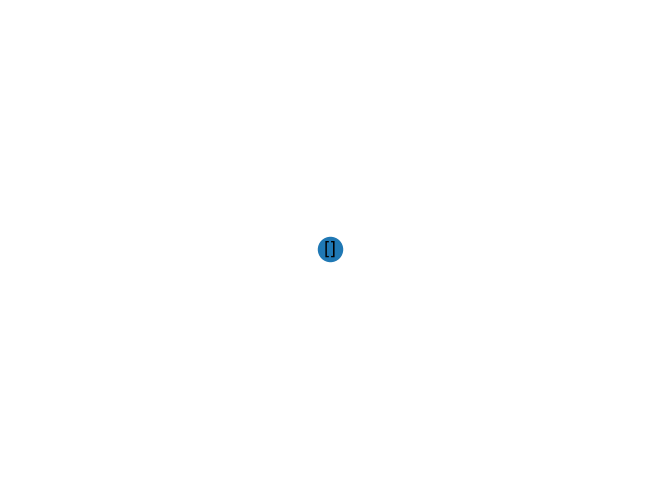

In [10]:
# order = 4 --> Maximum 3 chilrdren per node
bpt = BPlusTree(4)

# Inserting multiple elements and visualizing after each insert

elements_to_insert = [29, 5, 7, 17, 19, 31, 2, 23, 11, 3]

for key in elements_to_insert:
    bpt.insert(key)
    print(f"After inserting {key}:")
    bpt.visualize()

for key in reversed(elements_to_insert):
    bpt.delete(key)
    print(f"After deleting {key}:")
    bpt.visualize()

### Testing search

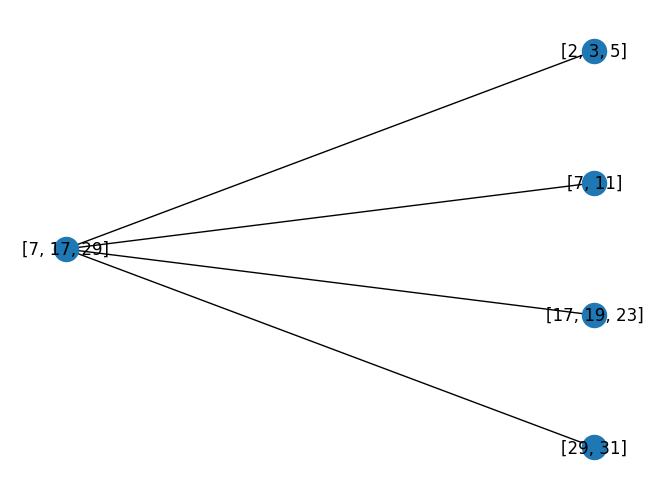

Element 29 found
Element 5 found
Element 7 found
Element 17 found
Element 19 found
Element 31 found
Element 2 found
Element 23 found
Element 11 found
Element 3 found
Element 100 not found
Element 500 not found


In [14]:
# order = 4 --> Maximum 3 chilrdren per node
bpt = BPlusTree(4)

# Inserting multiple elements and visualizing after each insert

elements_to_insert = [29, 5, 7, 17, 19, 31, 2, 23, 11, 3]

for key in elements_to_insert:
    bpt.insert(key)
bpt.visualize()
elements_to_search = [29, 5, 7, 17, 19, 31, 2, 23, 11, 3, 100, 500]
for element in elements_to_search:
    if bpt.search(element):
        print(f"Element {element} found")
    else:
        print(f"Element {element} not found")


### Testing Range Search
start = [1, 5, 7, 10, 18, 30, 30]
end = [31, 17, 11, 23, 23, 31, 20]
for s, e in zip(start, end):
    try:
        result = bpt.range_search(s, e)
        print(f"Range Search for {s} to {e}: {result}")
    except Exception as e:
        print(e)


[2, 3, 5]

In [2]:
# Execute the test procedure
test_operations()

************************************************************
Starting test operations script...

Testing dense_order_13:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.

Testing sparse_order_13:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.

Testing dense_order_24:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.

Testing sparse_order_24:
Success: insertion completed and logged.
Success: deletion completed and logged.
Success: additional operations completed and logged.
Success: search operations completed and logged.
************************************************************
Test oper